# Intro to Convolutional Neural Networks
*[Check the original article](https://docs.w3cub.com/tensorflow~guide/tutorials/layers)*


Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. CNNs contains three components:

- **Convolutional layers**, which apply a specified number of convolution filters to the image. For each subregion, the layer performs a set of mathematical operations to produce a single value in the output feature map. Convolutional layers then typically apply a ReLU activation function to the output to introduce nonlinearities into the model.

- **Pooling layers**, which downsample the image data extracted by the convolutional layers to reduce the dimensionality of the feature map in order to decrease processing time. A commonly used pooling algorithm is max pooling, which extracts subregions of the feature map (e.g., 2x2-pixel tiles), keeps their maximum value, and discards all other values.

- **Dense (fully connected) layers**, which perform classification on the features extracted by the convolutional layers and downsampled by the pooling layers. In a dense layer, every node in the layer is connected to every node in the preceding layer.

Typically, a CNN is composed of a stack of convolutional modules that perform feature extraction. Each module consists of a convolutional layer followed by a pooling layer. The last convolutional module is followed by one or more dense layers that perform classification. The final dense layer in a CNN contains a single node for each target class in the model (all the possible classes the model may predict), with a softmax activation function to generate a value between 0–1 for each node (the sum of all these softmax values is equal to 1). We can interpret the softmax values for a given image as relative measurements of how likely it is that the image falls into each target class.

Code from [here](https://www.tensorflow.org/tutorials/quickstart/beginner)

https://omegaml.github.io/omegaml/nb/tfestimator-tutorial.html?highlight=mnist

https://omegaml.github.io/omegaml/guide/getstarted.html#starting-omega-ml-locally

To run a local jupyter notebook within your omega|ml environment:
!wget https://raw.githubusercontent.com/omegaml/omegaml/master/docker-compose.yml
!docker-compose up -d

In [391]:
import omegaml as om
import numpy as np
import matplotlib.pyplot as plt
import time
import random

import mnist # https://github.com/datapythonista/mnist

import tensorflow as tf
print(tf.__version__)
# tf.logging.set_verbosity(tf.logging.INFO)


2.2.0


## Load the data

In [365]:
# Choose the size of the training dataset
row_number = 60000

In [366]:
# The mnist dataset originally 28x18
all_images = mnist.train_images()

# Downsample the training dataset
assert row_number<= all_images.shape[0], 'The number of rows wanted is higher than the size of the training dataset.'
train_images = all_images[:row_number, :]

# train_labels
all_labels = mnist.train_labels()
train_labels = all_labels[:row_number]

In [367]:
# Load the test dataset
test_images = mnist.test_images()
test_labels = mnist.test_labels()

## Assess the quality of the training and test datasets

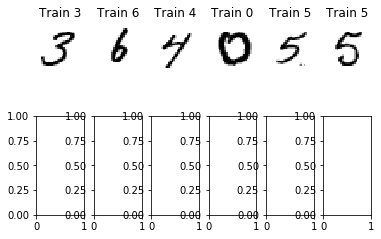

In [368]:
# Show a random sample of drawings from the train_images
n_show = 6
n = random.randint(n_show,train_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(train_images, train_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Train %i' % label)

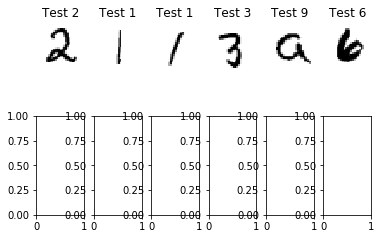

In [369]:
# Show a random sample of drawings from the test_images (for quality check)
n_show = 6
n = random.randint(n_show,test_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(test_images, test_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test %i' % label)

## Preprocessing

In [370]:
# Normalising the images
norm_images, norm_test = train_images/255, test_images/255

## Model function for CNN

In [371]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [372]:
# For each example the model returns a vector of "logits" or "log-odds" scores,
# one for each class.

predictions = model(norm_images[:1]).numpy()
predictions

array([[ 0.10951629,  0.11107666, -0.10979649, -0.4777438 , -0.58052504,
        -0.01035791,  0.4091346 ,  0.17074874, -0.14845933, -0.5942743 ]],
      dtype=float32)

In [373]:
# The tf.nn.softmax function converts these logits to "probabilities" for each
# class:

tf.nn.softmax(predictions).numpy()

array([[0.11863975, 0.11882501, 0.09527608, 0.06594569, 0.0595044 ,
        0.10523725, 0.1600858 , 0.12613137, 0.09166274, 0.05869186]],
      dtype=float32)

In [374]:
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a
# True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [375]:
# This loss is equal to the negative log probability of the true class: It is zero
# if the model is sure of the correct class.

# This untrained model gives probabilities close to random (1/10 for each class),
# so the initial loss should be close to -tf.log(1/10) ~= 2.3.

loss_fn(train_labels[:1], predictions).numpy()

2.2515378

In [376]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [377]:
# The Model.fit method adjusts the model parameters to minimize the loss:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4330 - accuracy: 0.7522
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6339 - accuracy: 0.8373
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8702
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4179 - accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8990
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3678 - accuracy: 0.9037
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3574 - accuracy: 0.9086
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.9147
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3270 - accuracy: 0.9148
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.320

In [378]:
# The Model.evaluate method checks the models performance, usually on a
# "Validation-set" or "Test-set".

model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - loss: 0.2969 - accuracy: 0.9403


[0.2968526780605316, 0.9402999877929688]

The image classifier is now trained to ~94% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/)

In [379]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(norm_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.09257199, 0.02634133, 0.04204759, 0.0515419 , 0.04854087,
        0.0485504 , 0.03124629, 0.03255663, 0.48752767, 0.1390753 ],
       [0.10785693, 0.0270547 , 0.04203179, 0.04984271, 0.03893365,
        0.04789545, 0.0437344 , 0.0255597 , 0.53521717, 0.08187346],
       [0.08641458, 0.02812085, 0.03751957, 0.04298344, 0.03993033,
        0.04471735, 0.04479773, 0.02500002, 0.5422409 , 0.10827522],
       [0.10731189, 0.0222143 , 0.03753642, 0.04539711, 0.03927771,
        0.04508806, 0.04254097, 0.02422494, 0.5225017 , 0.11390683],
       [0.10451666, 0.0200776 , 0.04040614, 0.04610874, 0.04979809,
        0.04664694, 0.04533833, 0.02624791, 0.4935732 , 0.12728633]],
      dtype=float32)>

## Test the model

In [386]:
# Publishing the model
# Time consuming task generally realized in 2min
start_time = time.time()

om.models.put(model, 'cnn_TensorFlow')

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model stored in '+ str(dur_min) + " minutes.")

Model stored in 0 minutes.


In [390]:
om.models.list()

['classifier_15000', 'classifier_60000', 'cnn_TF', 'cnn_TensorFlow']

In [382]:
# Retrieving a model
classifier_test = om.models.get('CNN')
classifier_test

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  24  47  44   0   0  51 191 254 255 242 119  24   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  70 218 253 250 197
  111 192 253 253 253 253 253 217  31   0   0   0   0   0   0   0   0   0
    0   0   0   0  36 224 253 253 253 253 253 253 172  10 125 251 253 253
  192   6   0   0   0   0   0   0   0   0   0   0   0   0 140 253 245 170
  170 225 253 253 253  39   0 128 253 

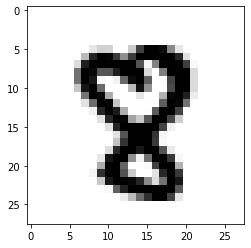

In [383]:
n = random.randint(0,test_images.shape[0])
test_single = test_images[n]

flatten_single = test_single.reshape(1, -1)
print(flatten_single)
predicted = classifier_test.predict(flatten_single)
result = np.where(predicted == np.amax(predicted))

plt.imshow(test_single, cmap=plt.cm.gray_r, interpolation='nearest')
print('Instance from the mnist.test_images() on row %i' %n)
print('Expected: %i' % test_labels[n])
print('Predictions: %i' % result[1][0])
print(predicted)